In [1]:
# 코스닥, 코스피, 코넥스별 시가총액 흐름
today = '2021-02-23'
first = '1995-05-02'
billion = 1000000000

In [2]:
# 기본 모듈 로드
import pandas as pd
from marcap import marcap_data
import matplotlib.pyplot as plt

In [3]:
# 그래프 설정
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["xtick.minor.visible"] = True 

pd.options.display.float_format = '{:.2f}'.format

In [4]:
df = marcap_data(first, today)

c:\users\j\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
c:\users\j\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
marcap_daily = df.groupby('Date').sum()['Marcap']

<AxesSubplot:xlabel='Date'>

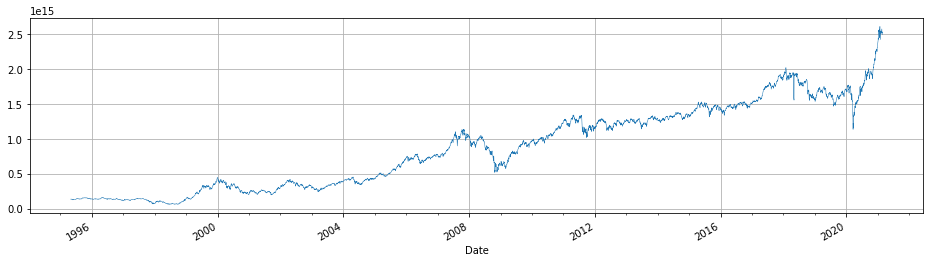

In [6]:
marcap_daily.plot()

In [7]:
df.head()

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Rank,ChangesRatio
Date,,,,,,,,,,,,,,,,,,
1995-05-02,15760,한국전력공사,KOSPI,NaN,27400.00,2,-400.00,-1.44,27600.00,27800.00,27400.00,118190.00,3255694000.00,16872679291000.00,615791215.00,STK,1,NaN
1995-05-02,5930,삼성전자,KOSPI,NaN,119500.00,2,-1000.00,-0.83,121000.00,121000.00,118500.00,139560.00,16676735000.00,6497053077500.00,54368645.00,STK,2,NaN
1995-05-02,5490,포항종합제철,KOSPI,NaN,65500.00,2,-300.00,-0.46,65800.00,66200.00,65400.00,65970.00,4334472000.00,6150568555000.00,93901810.00,STK,3,NaN
1995-05-02,200,대우중공업,KOSPI,NaN,9800.00,1,300.00,3.16,9500.00,9840.00,9500.00,288380.00,2805133500.00,3500638978200.00,357208059.00,STK,4,NaN
1995-05-02,2610,엘지전자,KOSPI,NaN,31700.00,2,-300.00,-0.94,32000.00,32000.00,31700.00,171460.00,5452050000.00,2521027012200.00,79527666.00,STK,5,NaN


In [8]:
kospi = df[df["Market"] == "KOSPI"]

In [9]:
kospi_daily = kospi.groupby("Date").sum()["Marcap"]

<AxesSubplot:xlabel='Date'>

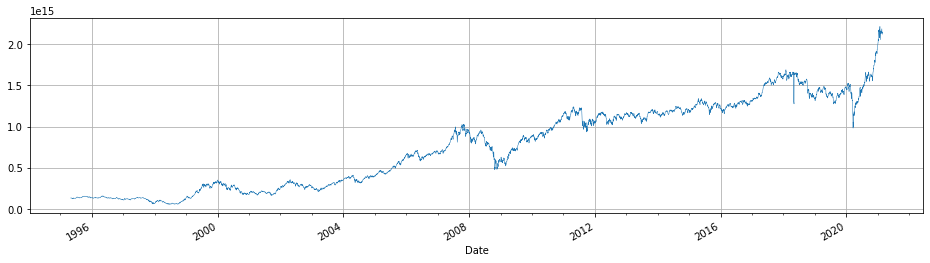

In [10]:
kospi_daily.plot()

In [11]:
kosdaq = df[df["Market"] == "KOSDAQ"]

In [12]:
kosdaq_daily = kosdaq.groupby("Date").sum()["Marcap"]

<AxesSubplot:xlabel='Date'>

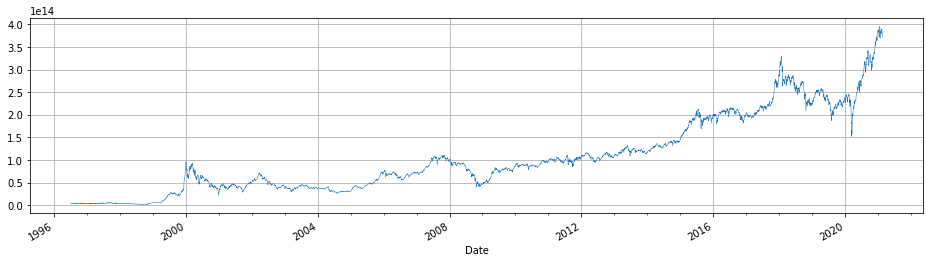

In [13]:
kosdaq_daily.plot()

In [14]:
konex = df[df["Market"] == "KONEX"]

In [15]:
konex_daily = konex.groupby("Date").sum()["Marcap"]

<AxesSubplot:xlabel='Date'>

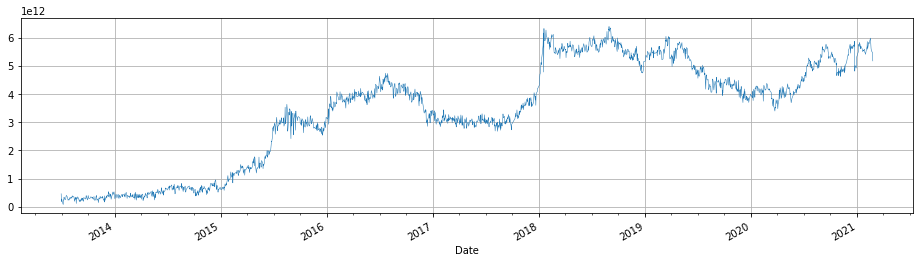

In [16]:
konex_daily.plot()

In [17]:
kospi_daily.iloc[-1]

2118096243096785.0

In [18]:
marcap_daily.iloc[-1]

2495949567193450.0

In [19]:
kospi_daily.iloc[-1] / marcap_daily.iloc[-1]

0.8486133978574179

In [20]:
gdp = pd.read_csv('marcap/gdp/gdp.csv')

In [21]:
marcap_daily.head()

Date
1995-05-02   134713479923960.00
1995-05-03   137255450392250.00
1995-05-04   137395277384830.00
1995-05-06   137122266028070.00
1995-05-08   136361070157380.00
Name: Marcap, dtype: float64

In [22]:
md = marcap_daily.to_frame()

In [23]:
md.head()

,Marcap
Date,
1995-05-02,134713479923960.00
1995-05-03,137255450392250.00
1995-05-04,137395277384830.00
1995-05-06,137122266028070.00
1995-05-08,136361070157380.00


In [24]:
md.reset_index(inplace=True)

In [25]:
md.head()

,Date,Marcap
0,1995-05-02,134713479923960.00
1,1995-05-03,137255450392250.00
2,1995-05-04,137395277384830.00
3,1995-05-06,137122266028070.00
4,1995-05-08,136361070157380.00


In [26]:
md.columns
'2013-02-01'[0:4]
latest_gdp = gdp[gdp['year']==2020]['gdp']
latest_gdp = latest_gdp.str.replace(',', '').astype(int)
latest_gdp

50    1898193
Name: gdp, dtype: int32

In [27]:
def get_gdp(row):
    if row['Date'].year == 2021:
        return latest_gdp*1.05
    else:
        return gdp[gdp['year'] == int(row['Date'].year)]['gdp'].str.replace(',', '').astype(int)

In [28]:
md['gdp'] = 0
md['gdp'] = md.apply(get_gdp, axis=1)

In [29]:
md

,Date,Marcap,gdp
0,1995-05-02,134713479923960.00,436989.00
1,1995-05-03,137255450392250.00,436989.00
2,1995-05-04,137395277384830.00,436989.00
3,1995-05-06,137122266028070.00,436989.00
4,1995-05-08,136361070157380.00,436989.00
...,...,...,...
6537,2021-02-17,2555734981794907.00,NaN
6538,2021-02-18,2519230751794617.00,NaN
6539,2021-02-19,2533909848462952.00,NaN
6540,2021-02-22,2510439649675253.00,NaN


In [30]:
latest_gdp*1.05

50   1993102.65
Name: gdp, dtype: float64

In [31]:
md.iloc[6541]['Date'].year == 2021

True